In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [77]:
uyla = pd.read_excel('/content/data_youla_final.xlsx')

drom = pd.read_excel('/content/drom_combined.xlsx')

In [3]:
uyla.head()

,URL,Описание,Поколение,Руль,Кузов,Цвет,Мощность,Тип двигателя,Объем двигателя,Коробка передач,Привод,Пробег,name,city,price,link
0,https://youla.ru/balashiha/auto/s-probegom/bmw...,Привет всем \nБМВ Е39 2003 год 2.2 механика ра...,E39 [рестайлинг],Левый,Седан,Синий,170 л.с.,Бензиновый,2.2 л,Механика,Задний,175000 км,"BMW 5 серия, 2003",Балашиха,520 000,https://youla.ru/balashiha/auto/s-probegom/bmw...
1,https://youla.ru/balashiha/auto/s-probegom/bmw...,"Срочно. Без торга. Рест, 3.0 бензин. Задний пр...",E60/E61 [рестайлинг],Левый,Седан,Серебряный,272 л.с.,Бензиновый,3 л,Автомат,Задний,350000 км,"BMW 5 серия, 2007",Балашиха,850 000,https://youla.ru/balashiha/auto/s-probegom/bmw...
2,https://youla.ru/balashiha/auto/s-probegom/bmw...,NaN,G30,Левый,Седан,Серый,190 л.с.,Дизельный,2 л,Автомат,Полный,68000 км,"BMW 5 серия, 2018",Балашиха,3 990 000,https://youla.ru/balashiha/auto/s-probegom/bmw...
3,https://youla.ru/balashiha/auto/s-probegom/bmw...,NaN,E70 [рестайлинг],Левый,Внедорожник,Черный,245 л.с.,Дизельный,NaN,Автомат,Полный,212008 км,"BMW X5, 2012",Балашиха,2 750 000,https://youla.ru/balashiha/auto/s-probegom/bmw...
4,https://youla.ru/balashiha/auto/s-probegom/bri...,NaN,1 поколение [рестайлинг],Левый,Внедорожник,Серебряный,107 л.с.,Бензиновый,1.5 л,Механика,Передний,2000 км,"Brilliance V3, 2019",Балашиха,850 000,https://youla.ru/balashiha/auto/s-probegom/bri...


In [4]:
print(uyla.shape)

(8687, 16)


In [5]:
drom.head()

,name,year,price_rub,engine_type,volume_liter,horsepower,transmission,drive_type,color,mileage_km,wheel_side,gen,post_date,extra,complectation,body_type,notes
0,Toyota Vellfire,2010,2900000,бензин,2.4,170.0,вариатор,передний,белый,113000,правый,1 поколение,04.03.2025,"Продаю семейный автомобиль , состояние идеальн...",NaN,NaN,NaN
1,Li L6,2024,6140000,бензин,1.5,154.0,АКПП,4WD,черный,новыйавтомобиль,левый,1 поколение,04.03.2025,NaN,1.5 SSR Max,NaN,NaN
2,Cadillac XT6,2020,4475000,бензин,2,200.0,АКПП,4WD,черный,73639,левый,1 поколение,04.03.2025,"20"" легкосплавные колесные диски\n2-х зонный к...",2.0 AT XT6 Sport 6-seats,NaN,NaN
3,Chery Tiggo 9,2024,5050000,бензин,2,249.0,АКПП,4WD,белый,новыйавтомобиль,левый,2 поколение,04.03.2025,NaN,2.0 TGDI AT AWD Ultra,NaN,NaN
4,Li L6,2024,6650000,гибрид,1.5,408.0,автомат,4WD,черный,новыйавтомобиль,левый,NaN,05.03.2025,NaN,NaN,NaN,NaN


In [6]:
print(drom.shape)

(5874, 17)


In [78]:
drop_list = ['URL', 'Описание', 'link', 'Объем двигателя', 'Поколение']
uyla = uyla.drop(columns=drop_list)

In [79]:
uyla = uyla.dropna()

In [80]:
print("Количество пропущенных значений:")
print(uyla.isnull().sum())
uyla = uyla.dropna()

Количество пропущенных значений:
Руль               0
Кузов              0
Цвет               0
Мощность           0
Тип двигателя      0
Коробка передач    0
Привод             0
Пробег             0
name               0
city               0
price              0
dtype: int64


In [22]:
uyla.shape

(8499, 11)

In [81]:
def extract_info(name):
    parts = name.split(',')
    brand_model = parts[0].strip() if len(parts) > 0 else None
    year = parts[1].strip() if len(parts) > 1 else None
    year = int(year)
    if brand_model:
        tokens = brand_model.split()
        brand = tokens[0] if tokens else None
        model = " ".join(tokens[1:]) if len(tokens) > 1 else None
    else:
        brand, model = None, None
    return pd.Series([brand, model, year])

uyla[['brand', 'model', 'year']] = df['name'].apply(extract_info)

uyla.head()

,Руль,Кузов,Цвет,Мощность,Тип двигателя,Коробка передач,Привод,Пробег,name,city,price,brand,model,year
0,Левый,Седан,Синий,170 л.с.,Бензиновый,Механика,Задний,175000 км,"BMW 5 серия, 2003",Балашиха,520 000,BMW,5 серия,2003
1,Левый,Седан,Серебряный,272 л.с.,Бензиновый,Автомат,Задний,350000 км,"BMW 5 серия, 2007",Балашиха,850 000,BMW,5 серия,2007
2,Левый,Седан,Серый,190 л.с.,Дизельный,Автомат,Полный,68000 км,"BMW 5 серия, 2018",Балашиха,3 990 000,BMW,5 серия,2018
3,Левый,Внедорожник,Черный,245 л.с.,Дизельный,Автомат,Полный,212008 км,"BMW X5, 2012",Балашиха,2 750 000,BMW,X5,2012
4,Левый,Внедорожник,Серебряный,107 л.с.,Бензиновый,Механика,Передний,2000 км,"Brilliance V3, 2019",Балашиха,850 000,Brilliance,V3,2019


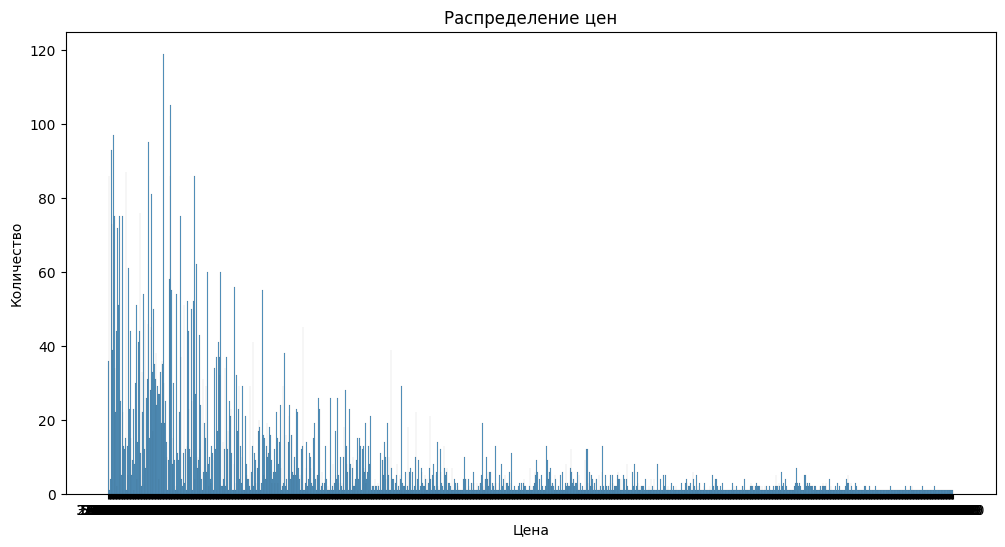

In [82]:
plt.figure(figsize=(12,6))

sns.histplot(uyla['price'])
plt.title('Распределение цен')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.show()

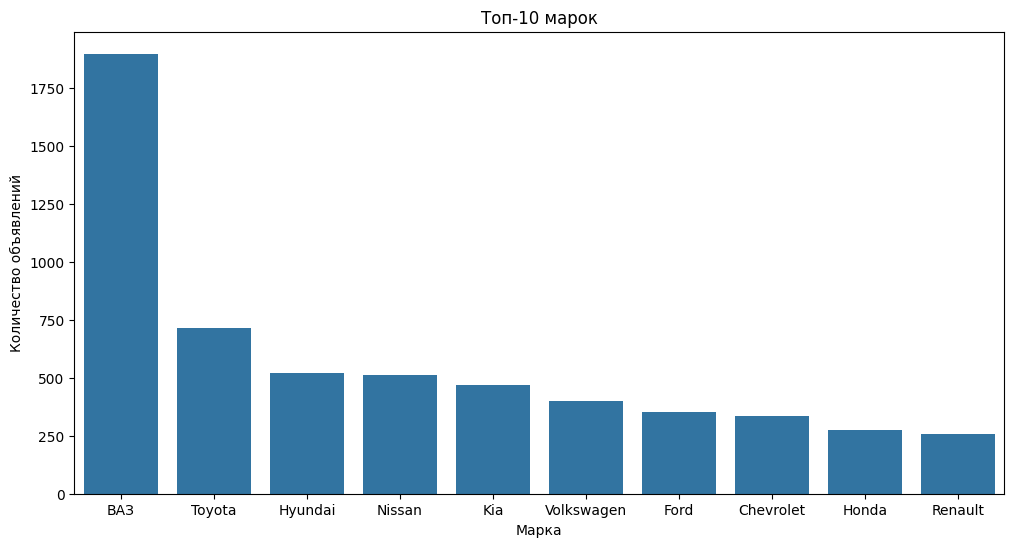

In [31]:
plt.figure(figsize=(12,6))

x = uyla['brand'].value_counts().nlargest(10)
sns.barplot(x=x.index, y=x.values)
plt.title('Топ-10 марок')
plt.xlabel('Марка')
plt.ylabel('Количество объявлений')
plt.show()

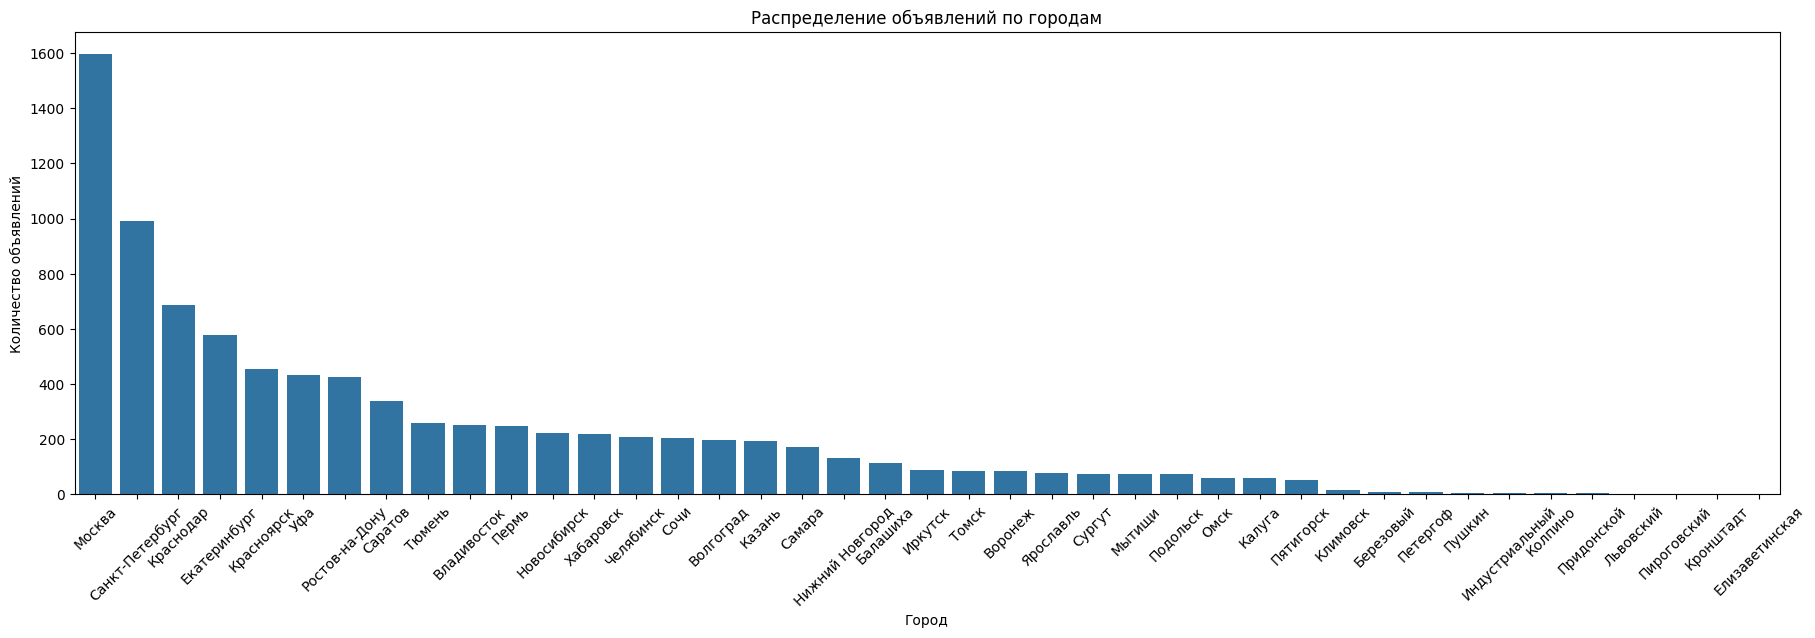

In [40]:
plt.figure(figsize=(22,6))

x = uyla['city'].value_counts()
sns.barplot(x=x.index, y=city_counts.values)
plt.title('Распределение объявлений по городам')
plt.xlabel('Город')
plt.ylabel('Количество объявлений')
plt.xticks(rotation=45)
plt.show()

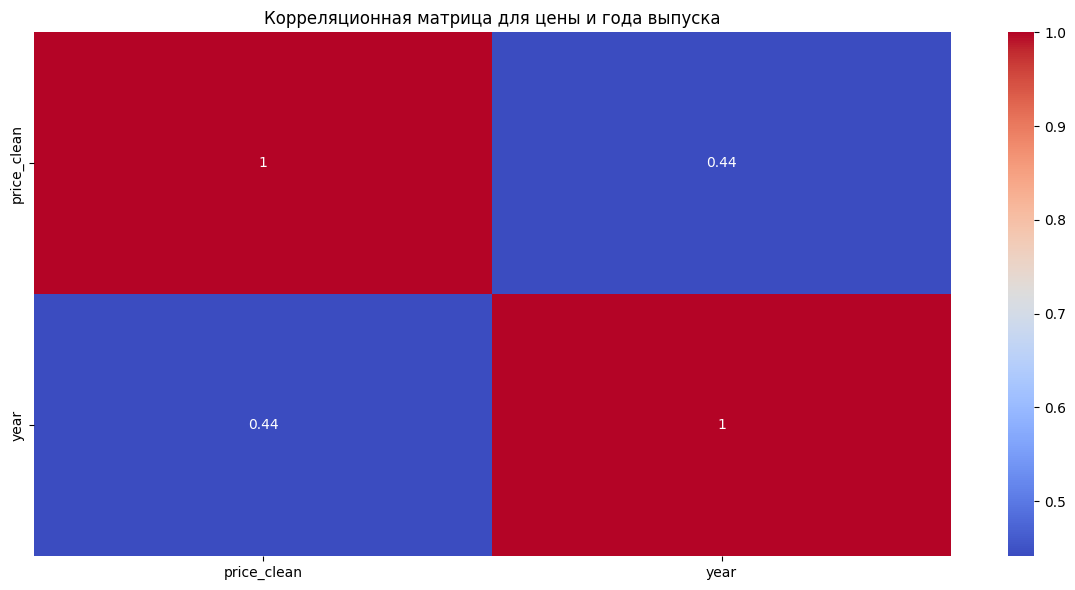

In [47]:
plt.figure(figsize=(12,6))

x = ['price', 'year']
x = uyla[x]
c = x.corr()
sns.heatmap(c, annot=True,cmap='coolwarm')
plt.title('Корреляционная матрица для цены и года выпуска')
plt.tight_layout()
plt.show()

In [86]:
drop_list = ['extra', 'complectation', 'body_type', 'body_type', 'gen', 'notes']
drom = drom.drop(columns=drop_list)

In [87]:
drom = drom.dropna()

In [88]:
print("Количество пропущенных значений:")
print(drom.isnull().sum())

Количество пропущенных значений:
name            0
year            0
price_rub       0
engine_type     0
volume_liter    0
horsepower      0
transmission    0
drive_type      0
color           0
mileage_km      0
wheel_side      0
post_date       0
site            0
dtype: int64


In [63]:
drom.shape

(5263, 12)

In [64]:
drom.head(1)

,name,year,price_rub,engine_type,volume_liter,horsepower,transmission,drive_type,color,mileage_km,wheel_side,post_date
0,Toyota Vellfire,2010,2900000,бензин,2.4,170.0,вариатор,передний,белый,113000,правый,04.03.2025


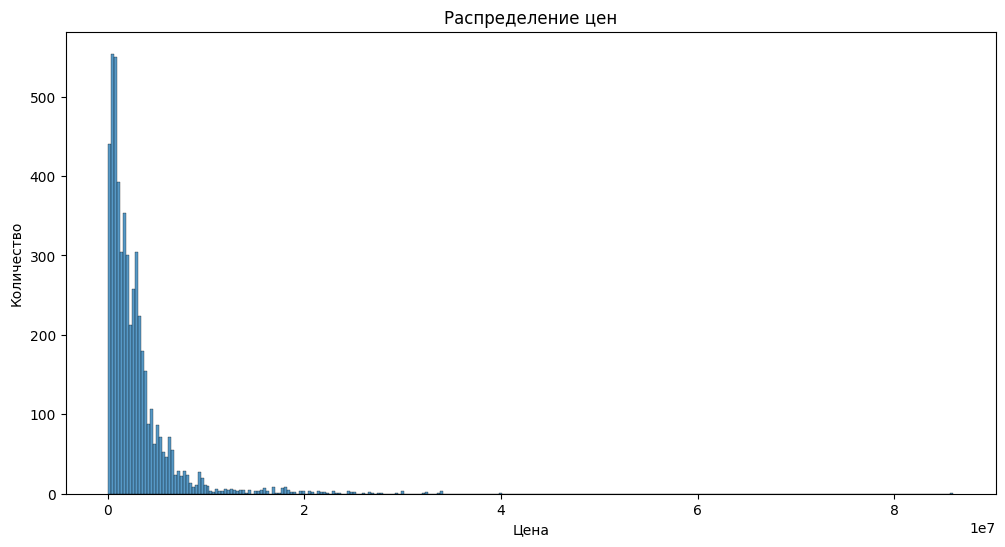

In [65]:
plt.figure(figsize=(12,6))

sns.histplot(drom['price_rub'])
plt.title('Распределение цен')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.show()

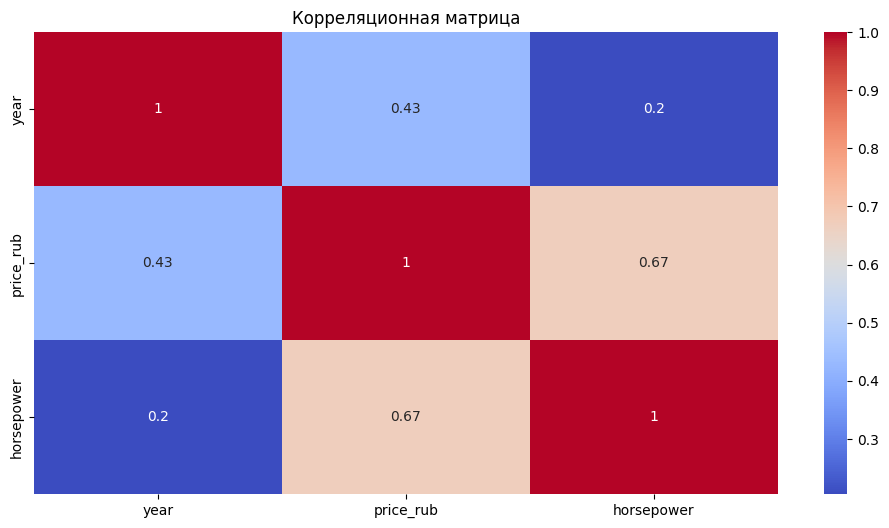

In [72]:
plt.figure(figsize=(12,6))

corr = drom.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [89]:
drom['site'] = 'Drom'

In [94]:
uyla['site'] = 'Uyla'

In [91]:
drom.head(1)

,name,year,price_rub,engine_type,volume_liter,horsepower,transmission,drive_type,color,mileage_km,wheel_side,post_date,site
0,Toyota Vellfire,2010,2900000,бензин,2.4,170.0,вариатор,передний,белый,113000,правый,04.03.2025,Drom


In [95]:
uyla.head(1)

,Руль,Кузов,Цвет,Мощность,Тип двигателя,Коробка передач,Привод,Пробег,name,city,price,brand,model,year,site
0,Левый,Седан,Синий,170 л.с.,Бензиновый,Механика,Задний,175000 км,"BMW 5 серия, 2003",Балашиха,520 000,BMW,5 серия,2003,Uyla


In [111]:
drom = drom.rename(columns={
    'price_rub': 'price',
    'engine_type': 'Тип двигателя',
    'horsepower': 'Мощность',
    'transmission': 'Коробка передач',
    'drive_type': 'Привод',
    'color': 'Цвет',
    'mileage_km': 'Пробег',
    'wheel_side': 'Руль',})

common_col = drom.columns.intersection(uyla.columns)
print(common_col)

Index(['name', 'year', 'price', 'Тип двигателя', 'Мощность', 'Коробка передач',
       'Привод', 'Цвет', 'Пробег', 'Руль', 'site'],
      dtype='object')


In [112]:
df = pd.concat([drom, uyla], ignore_index=True)

print("Размер объединённого DataFrame:", df.shape)
print("Столбцы объединённого DataFrame:", df.columns)

Размер объединённого DataFrame: (13762, 17)
Столбцы объединённого DataFrame: Index(['name', 'year', 'price', 'Тип двигателя', 'volume_liter', 'Мощность',
       'Коробка передач', 'Привод', 'Цвет', 'Пробег', 'Руль', 'post_date',
       'site', 'Кузов', 'city', 'brand', 'model'],
      dtype='object')


In [114]:
x = ['volume_liter', 'volume_liter', 'Кузов', 'city', 'brand', 'model', 'post_date']
df = df.drop(columns=x)

df

,name,year,price,Тип двигателя,Мощность,Коробка передач,Привод,Цвет,Пробег,Руль,site
0,Toyota Vellfire,2010,2900000,бензин,170.0,вариатор,передний,белый,113000,правый,Drom
1,Li L6,2024,6140000,бензин,154.0,АКПП,4WD,черный,новыйавтомобиль,левый,Drom
2,Cadillac XT6,2020,4475000,бензин,200.0,АКПП,4WD,черный,73639,левый,Drom
3,Chery Tiggo 9,2024,5050000,бензин,249.0,АКПП,4WD,белый,новыйавтомобиль,левый,Drom
4,Li L6,2024,6650000,гибрид,408.0,автомат,4WD,черный,новыйавтомобиль,левый,Drom
...,...,...,...,...,...,...,...,...,...,...,...
13757,"ВАЗ (Lada) Vesta, 2020",2020,1 100 000,Бензиновый,122 л.с.,Механика,Передний,Белый,122522 км,Левый,Uyla
13758,"Volkswagen Golf, 2007",2007,517 000,Бензиновый,102 л.с.,Механика,Передний,Красный,288000 км,Левый,Uyla
13759,"Volkswagen Passat, 1998",1998,320 000,Бензиновый,101 л.с.,Механика,Передний,Синий,5660 км,Левый,Uyla
13760,"Volkswagen Polo, 2013",2013,710 000,Бензиновый,105 л.с.,Механика,Передний,Белый,135000 км,Левый,Uyla


In [123]:
df.dtypes

,0
name,object
year,int64
price,object
Тип двигателя,object
Мощность,object
Коробка передач,object
Привод,object
Цвет,object
Пробег,object
Руль,object


In [124]:
df['price'] = (df['price'].astype(str).str.replace(r'[^\d]', '', regex=True).astype(int))

df['Мощность'] = (df['Мощность'].astype(str).str.replace('л.с.', '', regex=False).str.replace(r'[^\d]', '', regex=True).astype(int))

In [115]:
print(df.isnull().sum())

name               0
year               0
price              0
Тип двигателя      0
Мощность           0
Коробка передач    0
Привод             0
Цвет               0
Пробег             0
Руль               0
site               0
dtype: int64


In [116]:
# df.to_csv("data.csv", index=False)

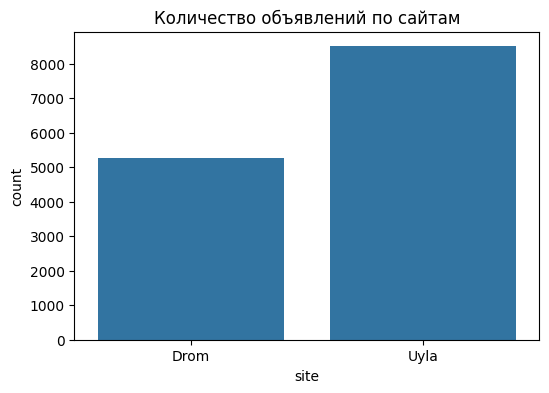

In [118]:
site_counts = df['site'].value_counts()

plt.figure(figsize=(6,4))

sns.countplot(data=df, x='site')
plt.title("Количество объявлений по сайтам")
plt.show()


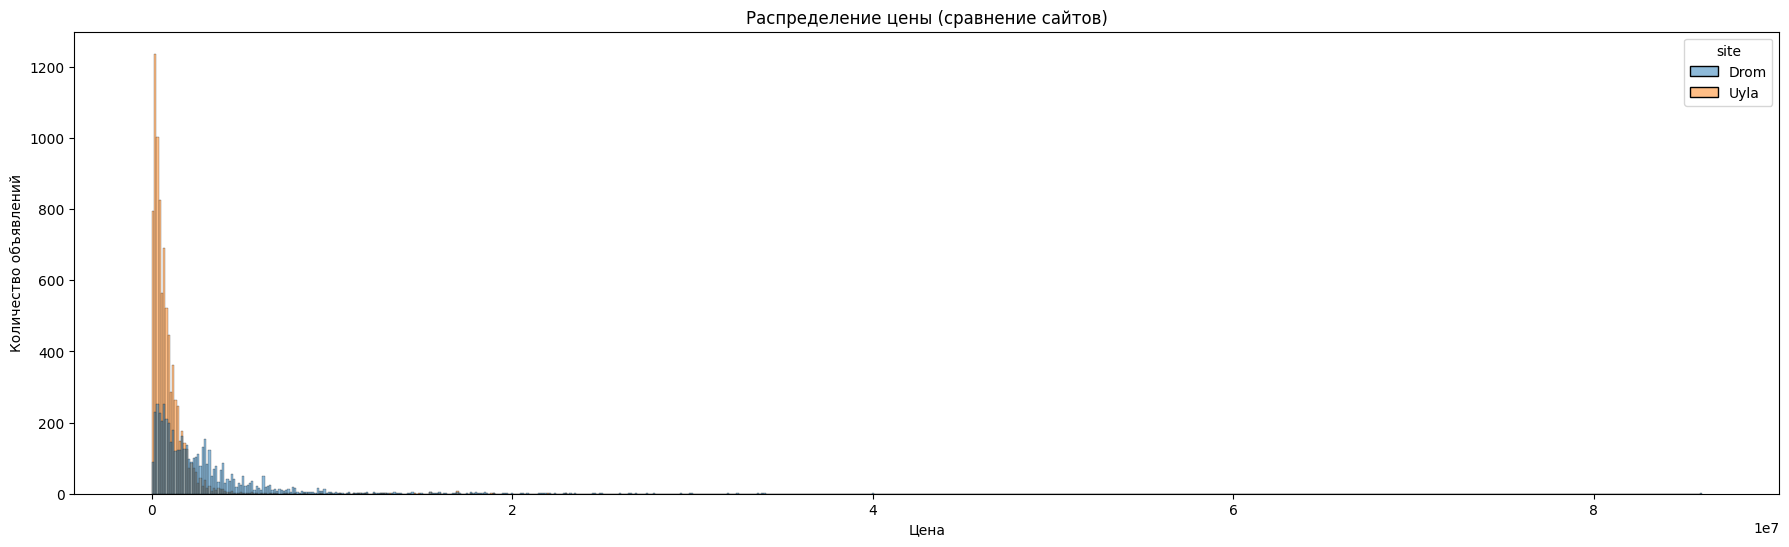

In [127]:
plt.figure(figsize=(22,6))

sns.histplot(data=df, x='price', hue='site')
plt.title("Распределение цены (сравнение сайтов)")
plt.xlabel("Цена")
plt.ylabel("Количество объявлений")
plt.show()


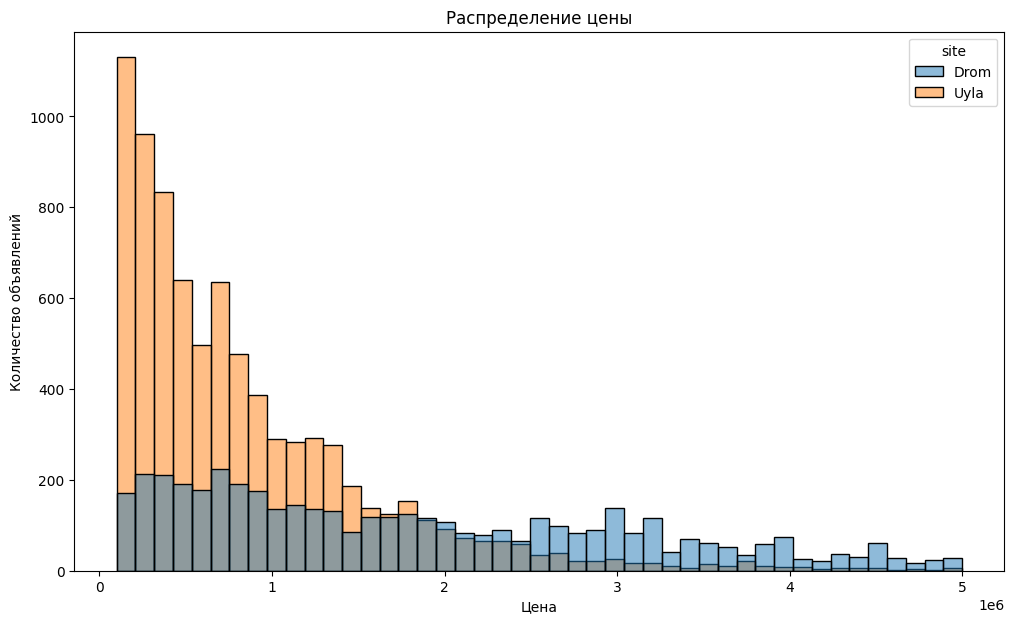

In [148]:
plt.figure(figsize=(12,7))

df_filtered = df[(df['price'] >= 100000) & (df['price'] <= 5000000)]

sns.histplot(data=df_filtered, x='price', hue='site')
plt.title("Распределение цены")
plt.xlabel("Цена")
plt.ylabel("Количество объявлений")
plt.show()


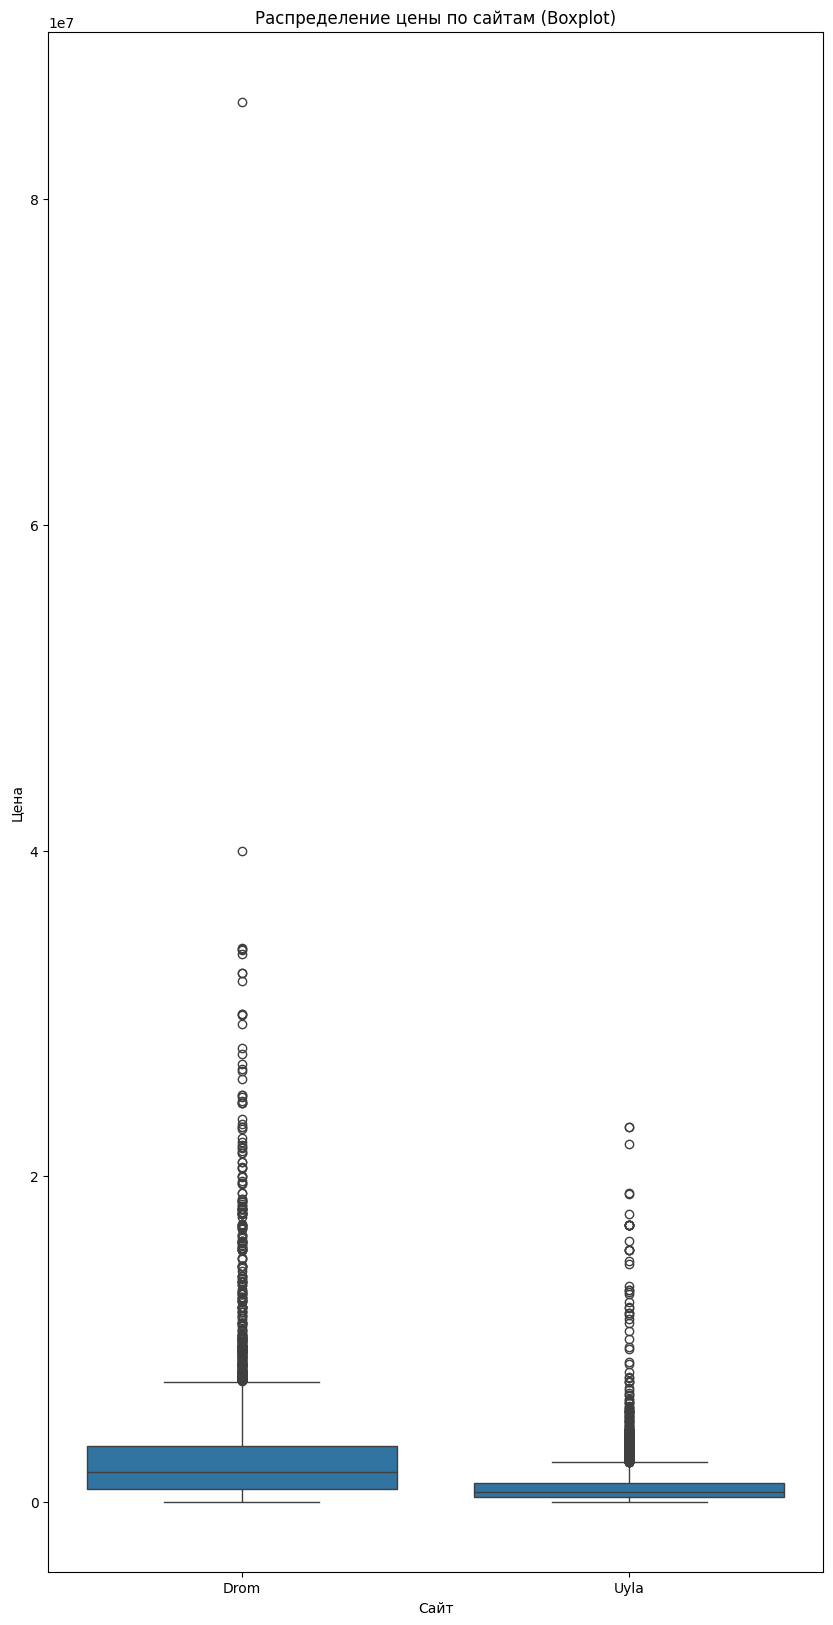

In [129]:
plt.figure(figsize=(10,20))

sns.boxplot(data=df, x='site', y='price')
plt.title("Распределение цены по сайтам (Boxplot)")
plt.xlabel("Сайт")
plt.ylabel("Цена")
plt.show()

In [130]:
res = df.groupby('site')['price'].agg(['count', 'mean', 'median', 'min', 'max'])
print(res)

      count          mean     median    min       max
site                                                 
Drom   5263  2.866648e+06  1875000.0  25000  85990000
Uyla   8499  8.982693e+05   600000.0  19500  23000000


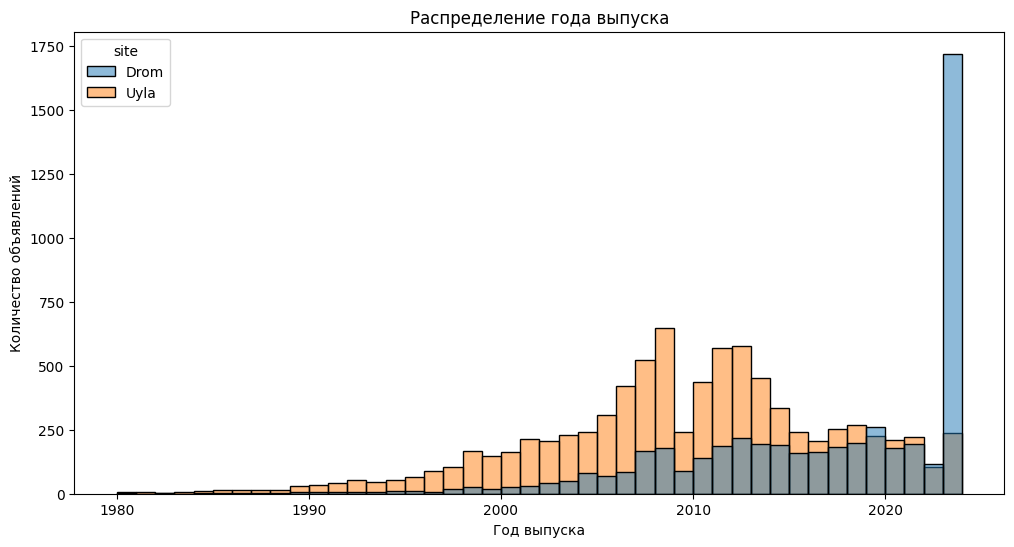

In [135]:
plt.figure(figsize=(12,6))

sns.histplot(data=df, x='year', hue='site', kde=False, bins=range(1980, 2025, 1))
plt.title("Распределение года выпуска")
plt.xlabel("Год выпуска")
plt.ylabel("Количество объявлений")
plt.show()

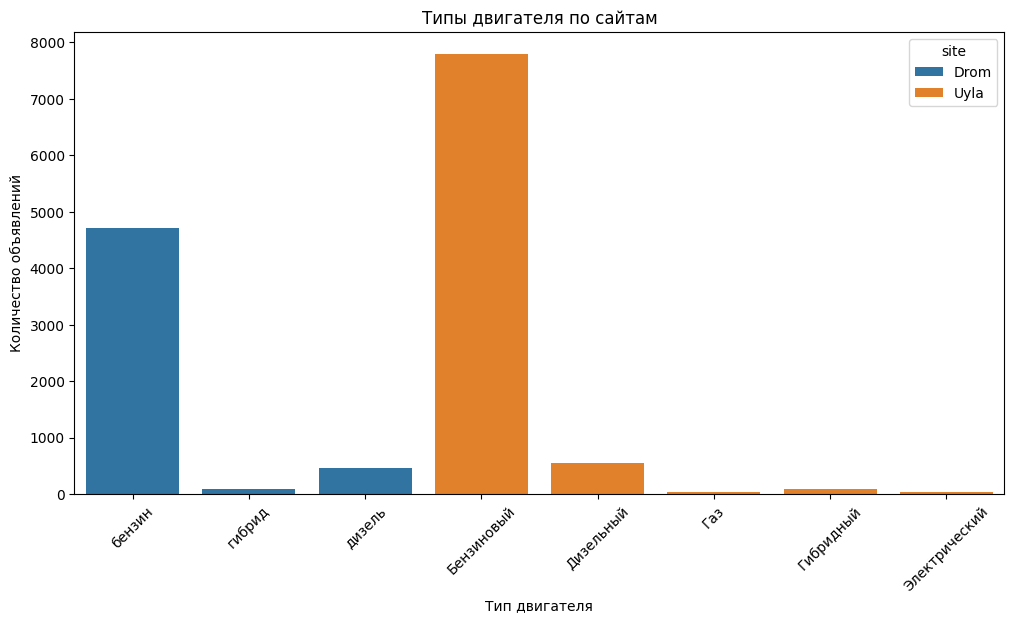

In [136]:
plt.figure(figsize=(12,6))

sns.countplot(data=df, x='Тип двигателя', hue='site')
plt.title("Типы двигателя по сайтам")
plt.xlabel("Тип двигателя")
plt.ylabel("Количество объявлений")
plt.xticks(rotation=45)
plt.show()

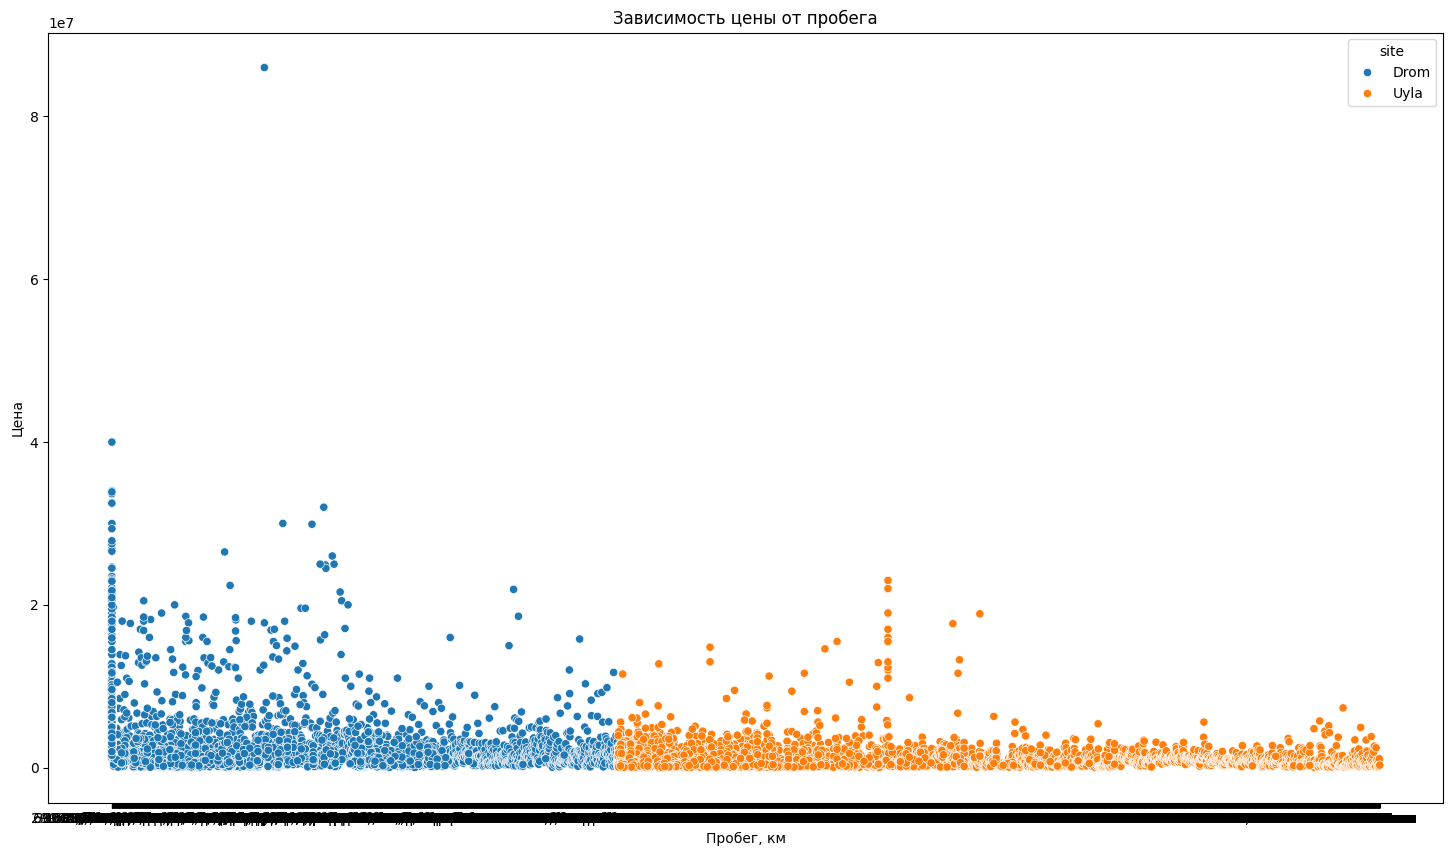

In [142]:
plt.figure(figsize=(18,10))

sns.scatterplot(data=df, x='Пробег', y='price', hue='site')
plt.title("Зависимость цены от пробега")
plt.xlabel("Пробег, км")
plt.ylabel("Цена")

plt.show()

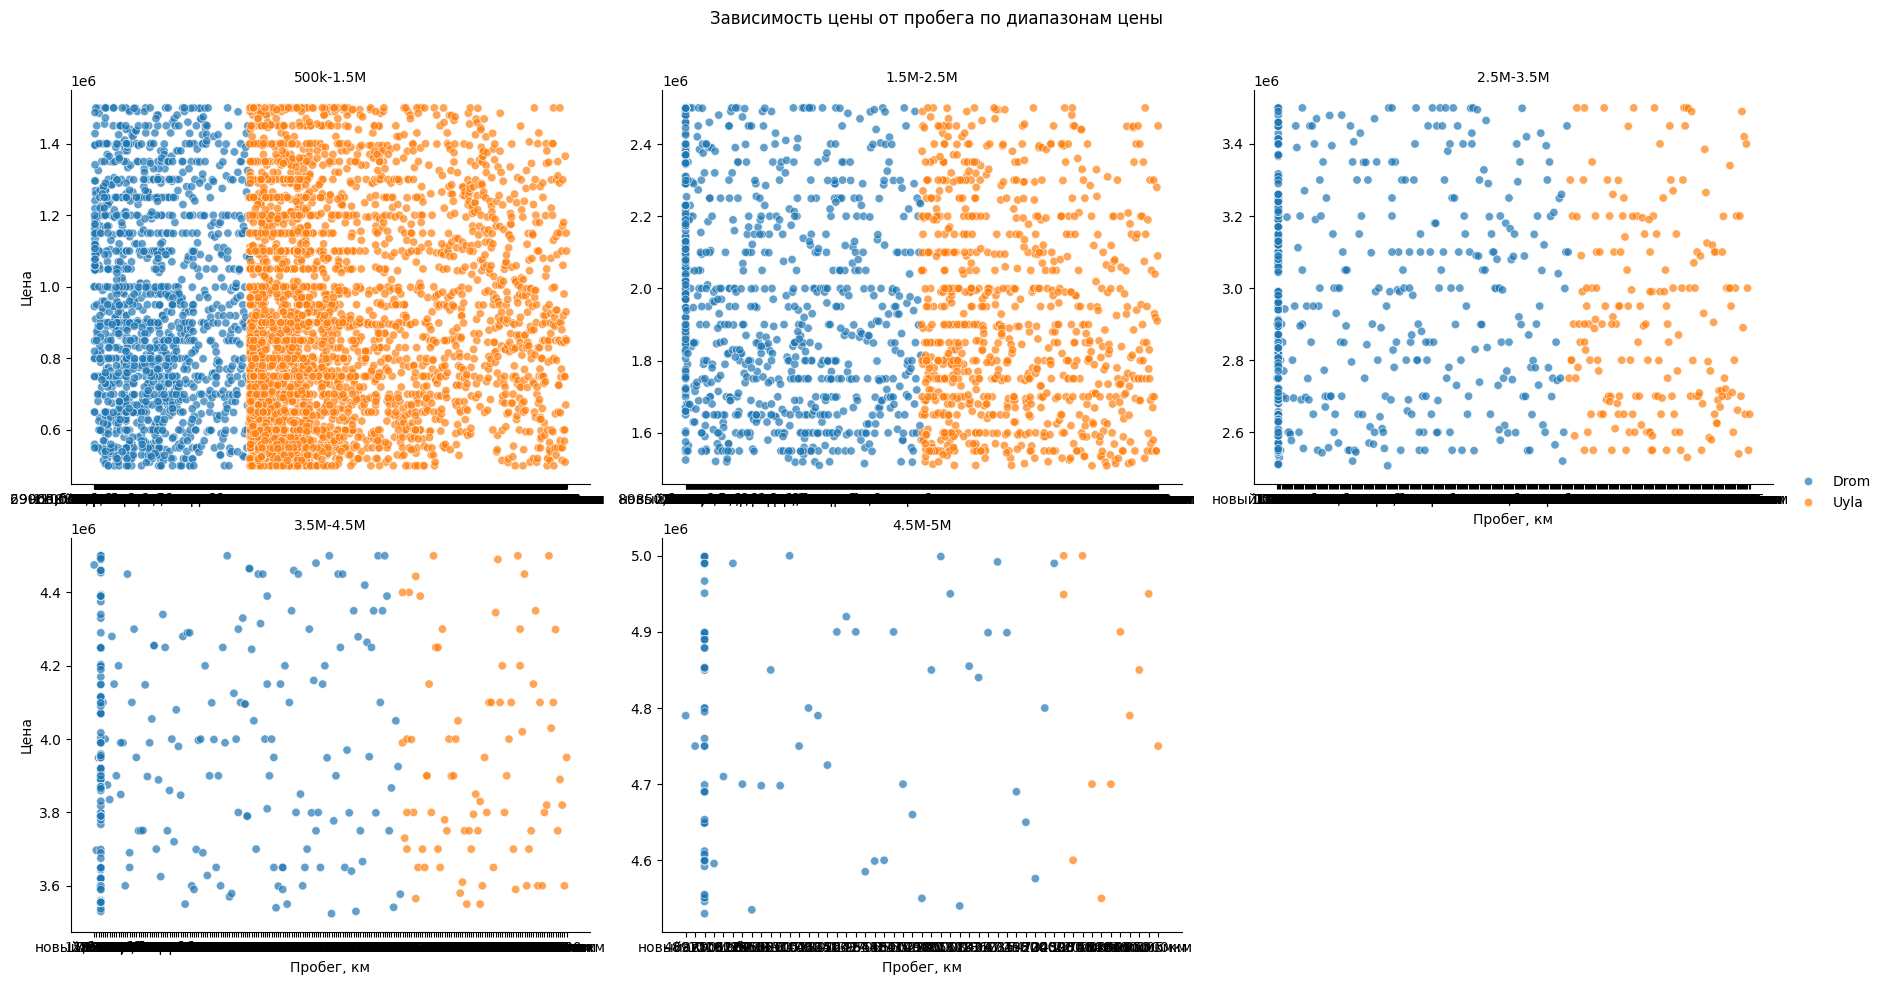

In [145]:

# df_filtered = df[(df['price'] >= 500000) & (df['price'] <= 5000000)].copy()

bins = [500000, 1500000, 2500000, 3500000, 4500000, 5000000]
labels = ['500k-1.5M', '1.5M-2.5M', '2.5M-3.5M', '3.5M-4.5M', '4.5M-5M']
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

# Создаем FacetGrid по диапазонам цены
g = sns.FacetGrid(df, col="price_range", col_wrap=3, height=5, aspect=1.2, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x='Пробег', y='price', hue='site', alpha=0.7)

# Настраиваем легенду и подписи
g.add_legend()
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Пробег, км", "Цена")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Зависимость цены от пробега по диапазонам цены")
plt.show()
